# imports

In [1]:
import os
import importlib
os.chdir('/data/core-kind/fatemeh/codes')

In [2]:
import RETFound_MAE.util.datasets
importlib.reload(RETFound_MAE.util.datasets)
from RETFound_MAE.util.datasets import *

# define args base

In [32]:
class Args:
    # Provided values
    batch_size = 64
    epochs = 300
    model = "vit_large_patch16"
    input_size = 224
    drop_path = 0.2
    weight_decay = 0.05
    blr = 5e-4
    layer_decay = 0.65
    nb_classes = 5
    data_path = "/data/core-kind/fatemeh/data/IDRiD_data"
    task = "./out_files/retfound_mode_op/"
    finetune = "/data/core-kind/fatemeh/data/op_weights.pth"
    world_size = 1
    balance = 1
    loss = "cross_entropy"
    use_sigmoid = 0
    master_port = 56157
    nproc_per_node = 1

    # Default values from function
    accum_iter = 1
    clip_grad = None
    lr = None
    min_lr = 1e-6
    warmup_epochs = 10
    color_jitter = None
    aa = "rand-m1-mstd0.5-inc1"
    smoothing = 0.1
    reprob = 0.1
    remode = "pixel"
    recount = 1
    resplit = False
    mixup = 0
    cutmix = 0
    cutmix_minmax = None
    mixup_prob = 1.0
    mixup_switch_prob = 0.5
    mixup_mode = "batch"
    global_pool = True
    cls_token = False
    output_dir = "./output_dir"
    log_dir = "./output_dir"
    device = "cuda"
    seed = 0
    resume = ""
    start_epoch = 0
    eval = False
    dist_eval = False
    num_workers = 10
    pin_mem = True
    no_pin_mem = False
    local_rank = -1
    dist_on_itp = False
    dist_url = "env://"
    stats_source='custom'

args = Args()


# visualization import

In [5]:
import data_exploration.visualze_samples
import importlib
importlib.reload(data_exploration.visualze_samples)

from data_exploration.visualze_samples import *

# scivias op

In [6]:
scivias_op = '/data/core-kind/fatemeh/data/op/organized/'
args.data_path = scivias_op

args.mean, args.std = calculate_mean_std(args.data_path + '/train/')

Calculating Mean and Std: 100%|██████████| 85/85 [00:06<00:00, 12.45it/s]


In [7]:
train_dataset = build_dataset('train', args)
test_dataset = build_dataset('test', args)

/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/torchvision/transforms/functional.py:443: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

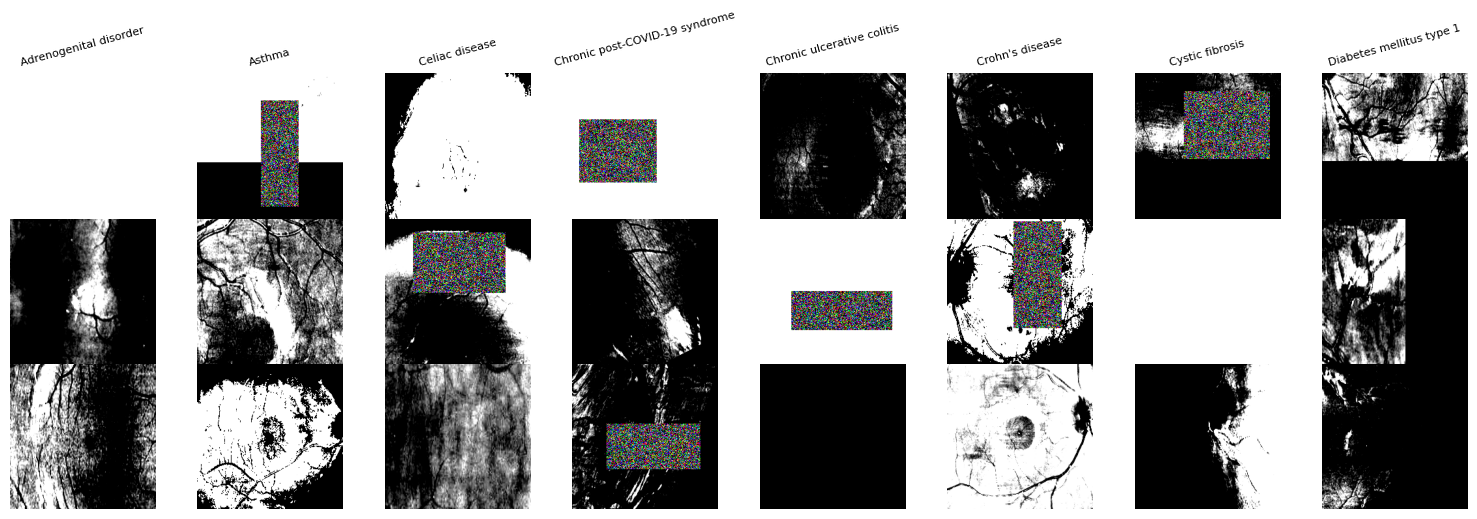

In [8]:
visualize_samples_from_imagefolder(train_dataset,3, class_range=(0, 7))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

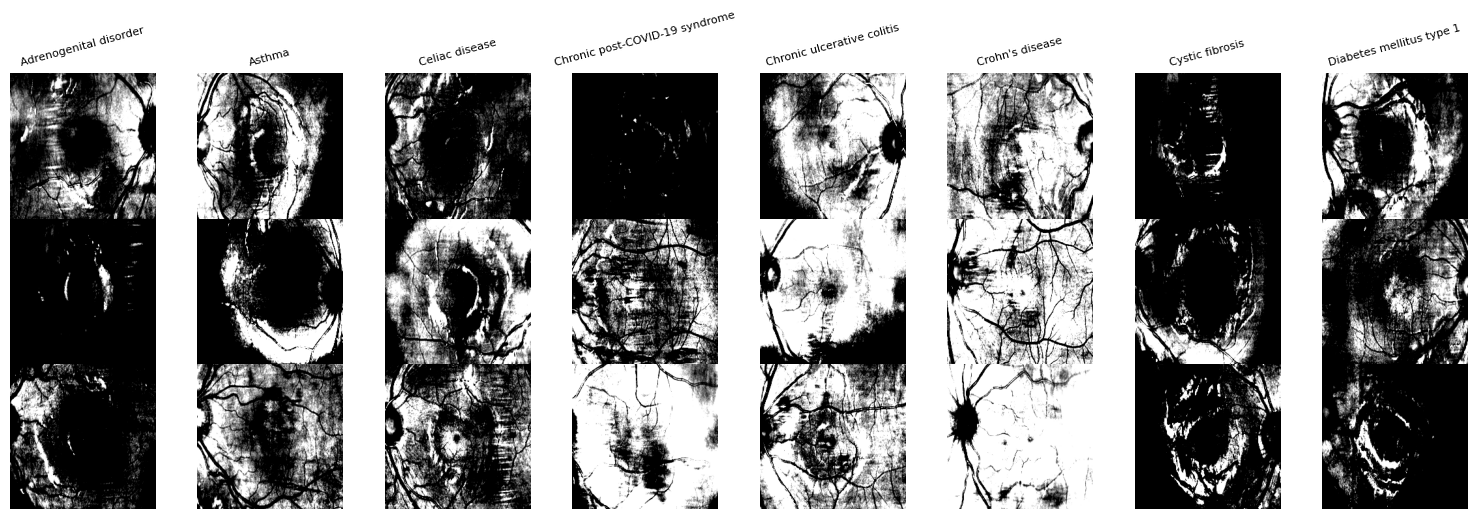

In [9]:
visualize_samples_from_imagefolder(test_dataset,3, class_range=(0, 7))

In [10]:
dataset = datasets.ImageFolder(scivias_op + '/train')

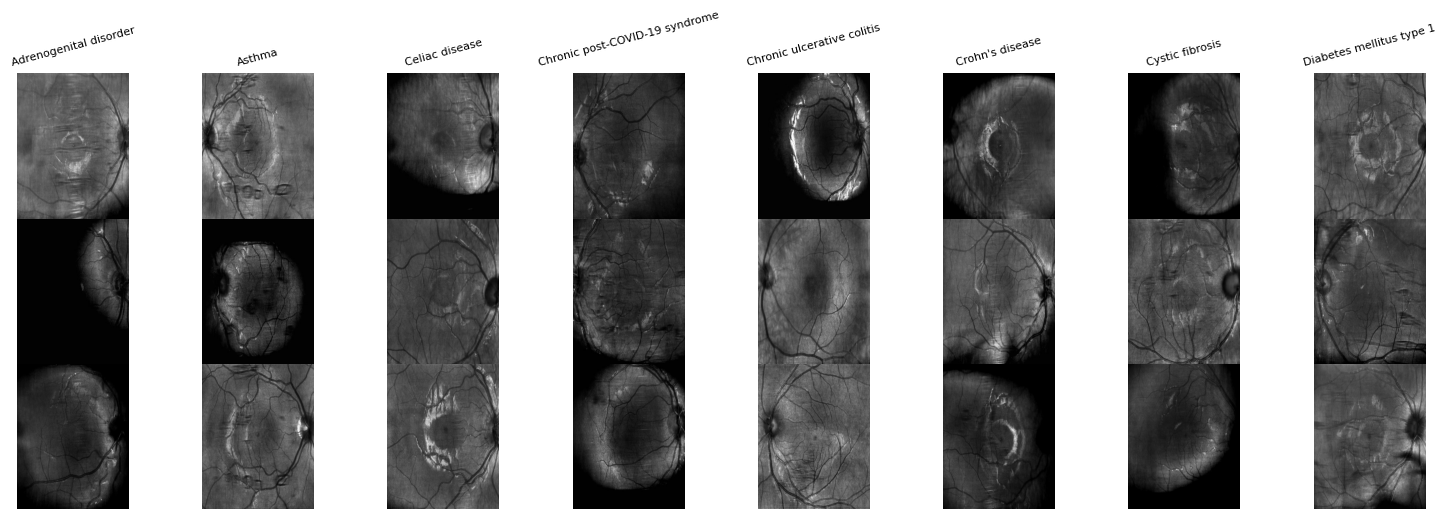

In [93]:
visualize_samples_from_imagefolder(dataset,3, class_range=(0, 7))

# opt

In [19]:
scivias_opt = '/data/core-kind/fatemeh/data/opt/organized/'
args.data_path = scivias_opt
args.mean, args.std = calculate_mean_std(args.data_path + '/train/')



Calculating Mean and Std: 100%|██████████| 85/85 [00:10<00:00,  8.15it/s]


In [21]:
mean, std = calculate_mean_std(args.data_path + '/train/')

Calculating Mean and Std: 100%|██████████| 85/85 [00:10<00:00,  7.74it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

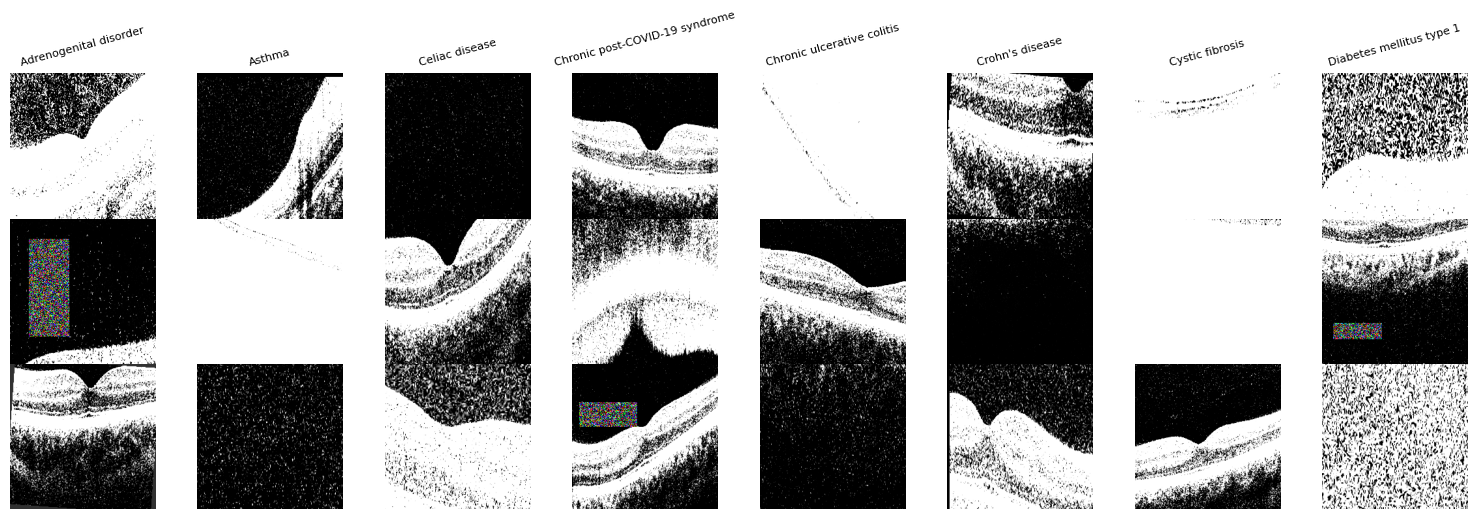

In [33]:
scivias_opt = '/data/core-kind/fatemeh/data/opt/organized/'
args.data_path = scivias_opt
args.mean, args.std = mean, std

opt_train =build_dataset('train', args)
opt_test = build_dataset('test', args)
visualize_samples_from_imagefolder(opt_train,3,class_range=(0, 7))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

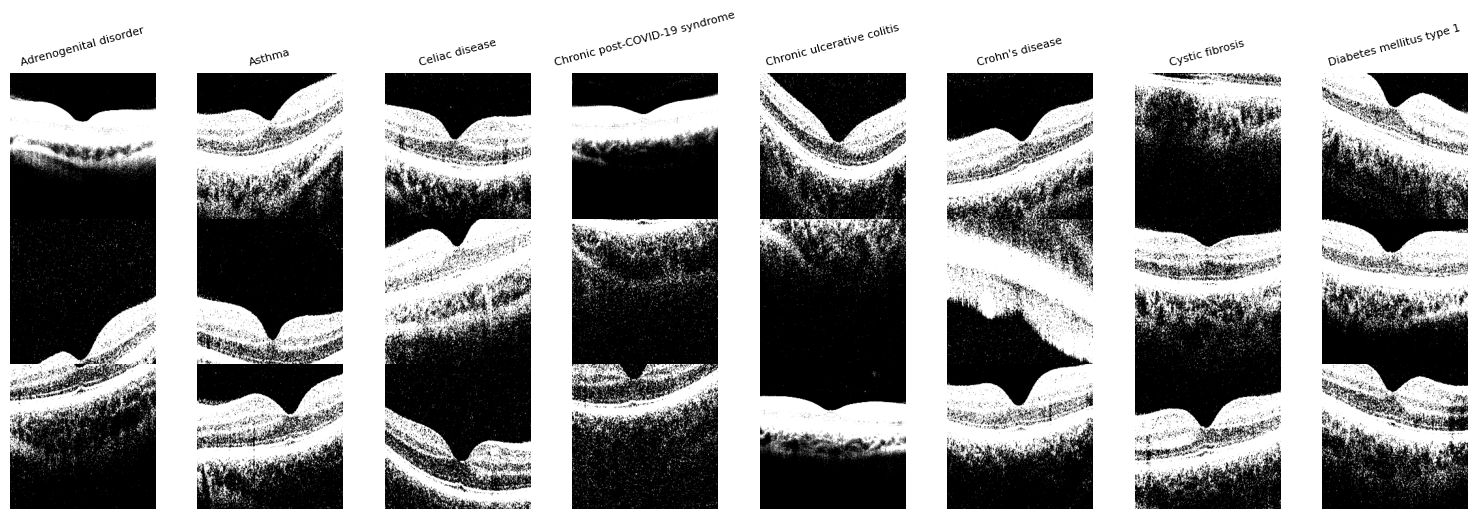

In [13]:
visualize_samples_from_imagefolder(opt_test,3,class_range=(0, 7))

In [14]:
scivias_ds = datasets.ImageFolder(scivias_opt + '/train', transform=transforms.Compose([
    transforms.Resize((224, 224)),
        # transforms.ToTensor(),  # Converts PIL images to PyTorch tensors
    
    ]))

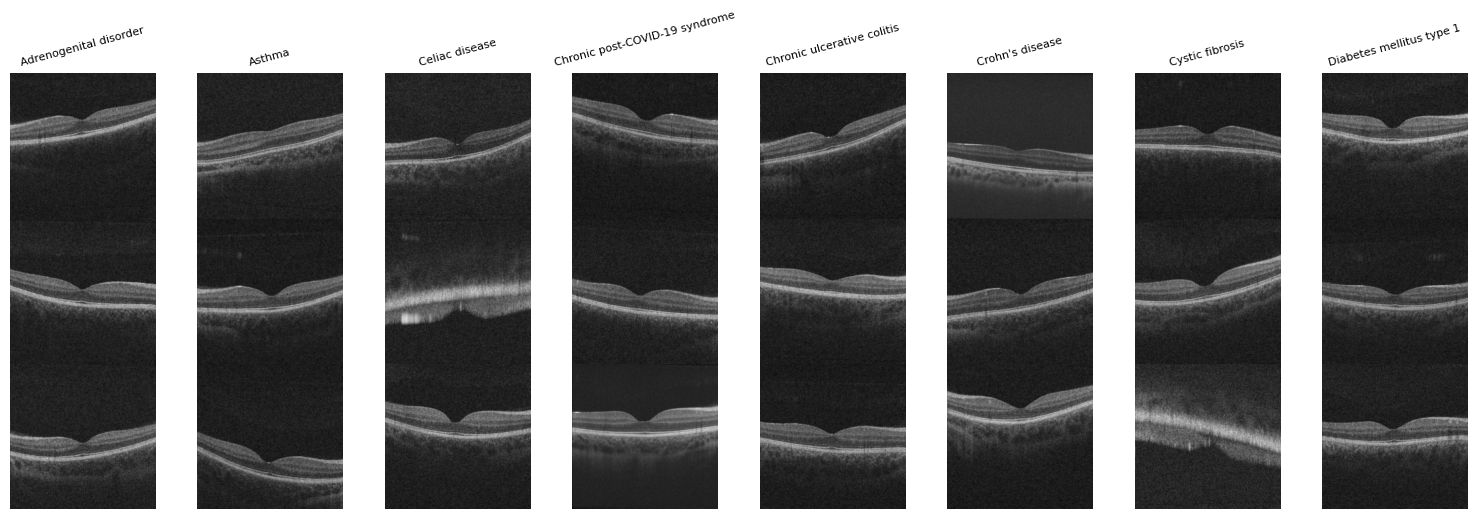

In [15]:
visualize_samples_from_imagefolder(scivias_ds,3, class_range=(0, 7))

# plot augmentaion effect

In [110]:
# import torch
# from torch.utils.data import DataLoader, WeightedRandomSampler
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# import numpy as np
# augmentations = transforms.Compose([
#         transforms.RandomHorizontalFlip(p=0.5),
#         transforms.RandomVerticalFlip(p=0.5),
#         transforms.RandomRotation(degrees=15),  # Slight rotation
#         transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),  # Random cropping
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Slight color variations
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0], std=[1])  # Normalize grayscale images
#     ])

In [37]:
from torchvision import transforms
from torchvision.transforms import RandomErasing

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
    # Add Random Erase for random drops
    RandomErasing(p=0.4, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0),  # Value can be 'mean', 0, or random
])


In [39]:
from torchvision import transforms
from torchvision.transforms import InterpolationMode, RandomErasing
import random

def get_custom_transform(args, is_train="train"):
    """
    Creates a suitable transformation pipeline for fine-tuning a transformer on OCT retina images.

    Args:
        args: Namespace containing necessary parameters like input_size, color_jitter, reprob, remode, recount, mean, std.
        is_train (str): The split type ('train', 'test', or 'val').

    Returns:
        A torchvision.transforms.Compose object containing the transformation pipeline.
    """
    # Shared transformations
    normalize = transforms.Normalize(mean=args.mean, std=args.std)
    resize = transforms.Resize((args.input_size, args.input_size), interpolation=InterpolationMode.BICUBIC)
    
    if is_train == "train":
        # Training Transformations
        transform = transforms.Compose([
            resize,
            transforms.ColorJitter(
                brightness=args.color_jitter if args.color_jitter else 0.1,
                contrast=args.color_jitter if args.color_jitter else 0.1,
                saturation=args.color_jitter if args.color_jitter else 0.1,
                hue=0.05
            ),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=15),
            transforms.RandomApply([transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))], p=0.3),
            transforms.ToTensor(),
            normalize,
            RandomErasing(
                p=args.reprob if hasattr(args, 'reprob') else 0.25,
                scale=(0.02, 0.33),
                ratio=(0.3, 3.3),
                value='mean' if args.remode == 'mean' else 0,
                inplace=True
            )
        ])
    elif is_train == "val":
        # Validation Transformations
        transform = transforms.Compose([
            resize,
            transforms.ToTensor(),
            normalize,
        ])
    elif is_train == "test":
        # Test Transformations
        transform = transforms.Compose([
            resize,
            transforms.ToTensor(),
            normalize,
        ])
    else:
        raise ValueError(f"Unknown split type: {is_train}. Must be 'train', 'val', or 'test'.")
    
    return transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

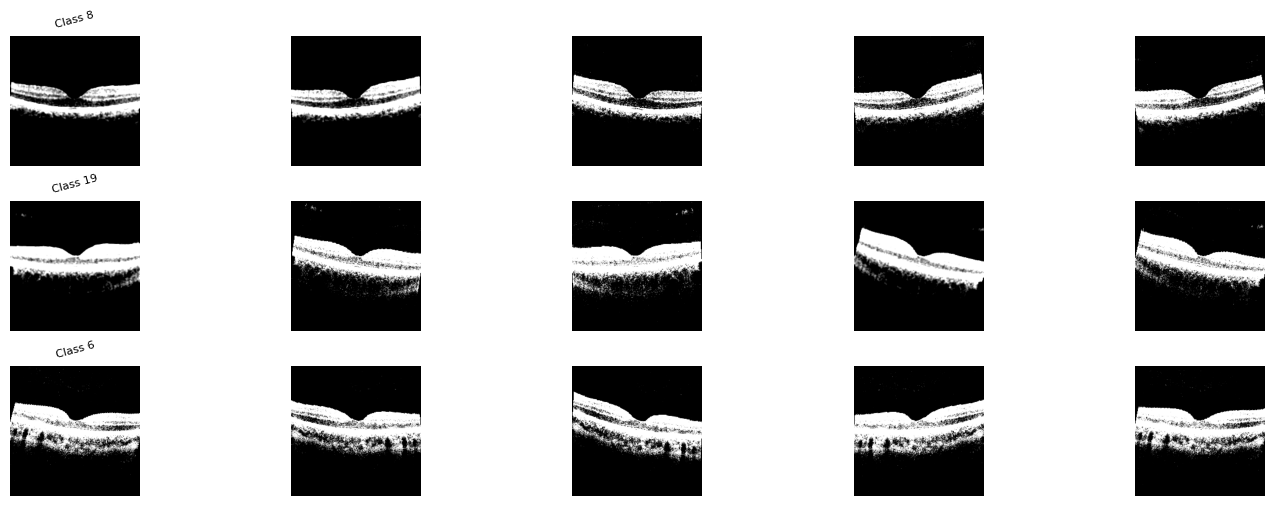

In [41]:
visualize_augmentations(scivias_ds, get_custom_transform(args))

# debug mean std calculation

In [3]:
scivias_op = '/data/core-kind/fatemeh/data/op/organized/'


In [4]:
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [5]:
data_path = scivias_op + 'train/'
dataset = datasets.ImageFolder(root=data_path, transform=transform)

In [8]:
loader = DataLoader(
        dataset, batch_size=16, shuffle=False, pin_memory=True
    )

In [ ]:
img, l = next(iter(loader))